![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP
## Grupo 25: Diego Peñaloza, Santiago Pulido, Cristhian Barbosa y Liliana Briceño
En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [8]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [9]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

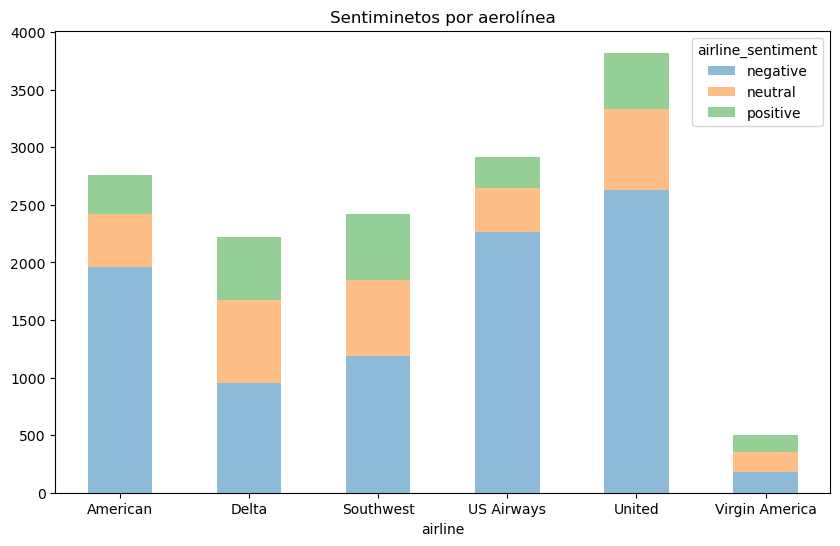

In [10]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import metrics

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lcata\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [13]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 1
RF = RandomForestClassifier()
vect = CountVectorizer()

X_train_vect = vect.fit_transform(X_train) #Transformación en vector de datos de entrenamiento
X_test_vect = vect.transform(X_test) #Transformación en vector de datos de prueba

RF.fit(X_train_vect, y_train)
y_pred = RF.predict(X_test_vect)

acc_RF_CV = metrics.accuracy_score(y_test,y_pred)
print("Accuracy count vectorizer usando RF: " + str(acc_RF_CV))

Accuracy count vectorizer usando RF: 0.7684188741721855


In [15]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)
print(reporte_clasificacion)

              precision    recall  f1-score   support

          -1       0.77      0.96      0.86      3085
           0       0.68      0.39      0.49       984
           1       0.85      0.46      0.60       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.65      4832
weighted avg       0.77      0.77      0.74      4832



#### Detalle palabras modelo

In [16]:
# Obtener el número de vectores y dimensiones del modelo
print("Número de vectores de características: ", X_train_vect.shape[0]) # Número de vectores de características en los datos de entrenamiento
print("Dimensiones del modelo: ", X_train_vect.shape[1]) # Dimensiones del modelo (tamaño del vocabulario)

# Ver el vocabulario aprendido por el vectorizador
#print("Vocabulario aprendido por el vectorizador: ", vect.get_feature_names())


Número de vectores de características:  9808
Dimensiones del modelo:  12056


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [54]:
# Celda 2
RF = RandomForestClassifier()
vect = CountVectorizer(stop_words='english')

X_train_vect = vect.fit_transform(X_train) #Transformación en vector de datos de entrenamiento
X_test_vect = vect.transform(X_test) #Transformación en vector de datos de prueba

RF.fit(X_train_vect, y_train)
y_pred = RF.predict(X_test_vect)

acc_RF_CVSW = metrics.accuracy_score(y_test,y_pred)
print("Accuracy count vectorizer eliminando stop words usando RF: " + str(acc_RF_CVSW ))

Accuracy count vectorizer eliminando stop words usando RF: 0.7624172185430463


In [55]:
# Obtener el número de vectores y dimensiones del modelo
print("Número de vectores de características: ", X_train_vect.shape[0]) # Número de vectores de características en los datos de entrenamiento
print("Dimensiones del modelo: ", X_train_vect.shape[1]) # Dimensiones del modelo (tamaño del vocabulario)

Número de vectores de características:  9808
Dimensiones del modelo:  11777


In [56]:

# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)
print(reporte_clasificacion)


              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      3085
           0       0.57      0.49      0.53       984
           1       0.71      0.60      0.65       763

    accuracy                           0.76      4832
   macro avg       0.70      0.66      0.68      4832
weighted avg       0.75      0.76      0.76      4832



### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [57]:
# Celda 3
#Inicializar el lematizador y el vectorizador
wordnet_lemmatizer = WordNetLemmatizer()
vect = CountVectorizer()
#lematizar twits
X_train_lemmatized = [" ".join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in text.split()]) for text in X_train]
X_test_lemmatized = [" ".join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in text.split()]) for text in X_test]
#vestorizar los twits
X_train_vect = vect.fit_transform(X_train_lemmatized)
X_test_vect = vect.transform(X_test_lemmatized)
#Modelo random Forest
RF = RandomForestClassifier()
RF.fit(X_train_vect, y_train)
#Predicciones
y_pred = RF.predict(X_test_vect)
acc_RF_CV_LM = accuracy_score(y_test, y_pred)
print("Accuracy del modelo Punto 3:", acc_RF_CV_LM)


Accuracy del modelo Punto 3: 0.7742135761589404


In [58]:
# Obtener el número de vectores y dimensiones del modelo
print("Número de vectores de características: ", X_train_vect.shape[0]) # Número de vectores de características en los datos de entrenamiento
print("Dimensiones del modelo: ", X_train_vect.shape[1]) # Dimensiones del modelo (tamaño del vocabulario)

Número de vectores de características:  9808
Dimensiones del modelo:  11384


In [59]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)
print(reporte_clasificacion)


              precision    recall  f1-score   support

          -1       0.78      0.97      0.86      3085
           0       0.71      0.40      0.51       984
           1       0.84      0.48      0.61       763

    accuracy                           0.77      4832
   macro avg       0.78      0.62      0.66      4832
weighted avg       0.77      0.77      0.75      4832



### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [81]:
# Celda 4
#Inicializar el lematizador y el vectorizador
wordnet_lemmatizer = WordNetLemmatizer()
vect = CountVectorizer(stop_words='english')
#lematizar twits
X_train_lemmatized = [" ".join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in text.split()]) for text in X_train]
X_test_lemmatized = [" ".join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in text.split()]) for text in X_test]
#vestorizar los twits
X_train_vect = vect.fit_transform(X_train_lemmatized)
X_test_vect = vect.transform(X_test_lemmatized)
#Modelo random Forest
RF = RandomForestClassifier()
RF.fit(X_train_vect, y_train)
#Predicciones
y_pred = RF.predict(X_test_vect)
acc_RF_CVSW_LM = accuracy_score(y_test, y_pred)
print("Accuracy del modelo Punto 4:", acc_RF_CVSW_LM)


Accuracy del modelo Punto 4: 0.7607615894039735


In [77]:
# Obtener el número de vectores y dimensiones del modelo
print("Número de vectores de características: ", X_train_vect.shape[0]) # Número de vectores de características en los datos de entrenamiento
print("Dimensiones del modelo: ", X_train_vect.shape[1]) # Dimensiones del modelo (tamaño del vocabulario)

Número de vectores de características:  9808
Dimensiones del modelo:  11109


In [78]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)
print(reporte_clasificacion)

              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      3085
           0       0.57      0.47      0.52       984
           1       0.71      0.61      0.66       763

    accuracy                           0.76      4832
   macro avg       0.70      0.66      0.68      4832
weighted avg       0.75      0.76      0.75      4832



### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

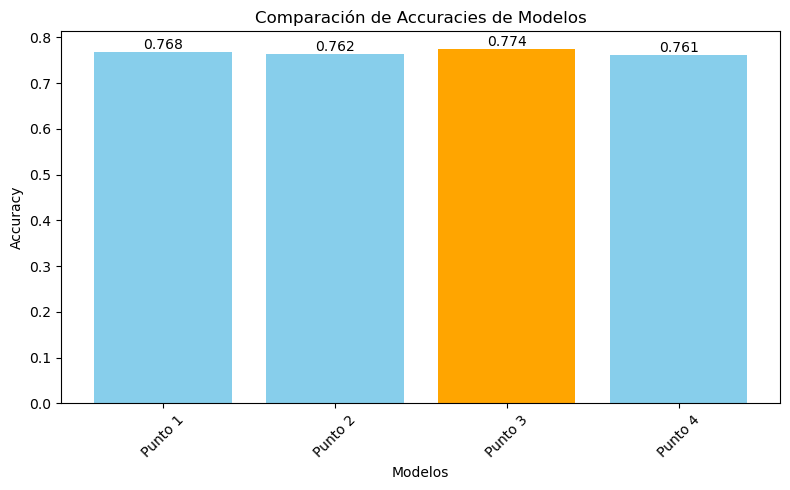

In [93]:
# Celda 5
import matplotlib.pyplot as plt

# Nombres de los modelos y sus accuracies
modelos = ['Punto 1', 'Punto 2', 'Punto 3', 'Punto 4']
accuracies = [acc_RF_CV, acc_RF_CVSW, acc_RF_CV_LM, acc_RF_CVSW_LM]  # Aquí debes reemplazar estos valores con los accuracies reales

# Encontrar el índice del accuracy más alto
indice_max = accuracies.index(max(accuracies))

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(modelos, accuracies, color=['skyblue' if i != indice_max else 'orange' for i in range(len(modelos))])

# Etiquetar los valores de accuracy en las barras
for i in range(len(modelos)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.3f}', ha='center', va='bottom')

# Agregar título y etiquetas
plt.title('Comparación de Accuracies de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El accuracy de cada unos de los modelos generados en los puntos previos, permite identificar que el modelo 3 correspondiente a los tweets aplicando el proceso de lematización de verbos tiene el mejor accuracy con un 77,4%. Sin embargo, los accuracy de todos los modelos son muy similares por lo cual consideramos importante analizar otras métricas que nos den más imformación del desempeño de cada modelo.

Para tal fin, decidimos ver las métricas de 'precision', 'recall' y 'f1-score' de cada una de las categorías del modelo (tweets positivos, neutros y negativos).

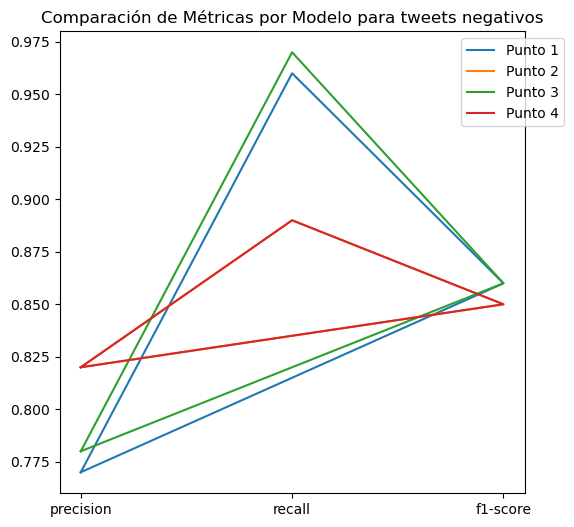

In [75]:
# Datos de ejemplo para cada modelo
modelo_1 = {'precision': 0.77, 'recall': 0.96, 'f1-score': 0.86}
modelo_2 = {'precision': 0.82, 'recall': 0.89, 'f1-score': 0.85}
modelo_3 = {'precision': 0.78, 'recall': 0.97, 'f1-score': 0.86}
modelo_4 = {'precision': 0.82, 'recall': 0.89, 'f1-score': 0.85}

# Lista de modelos y sus datos
modelos = ['Punto 1', 'Punto 2', 'Punto 3', 'Punto 4']
datos_modelos = [modelo_1, modelo_2, modelo_3, modelo_4]

# Nombre de las métricas
metricas = list(modelo_1.keys())

# Número de métricas
num_metricas = len(metricas)

# Ángulo de cada métrica
angulo = np.linspace(0, 2*np.pi, num_metricas, endpoint=False).tolist()

# Hacer que el gráfico sea circular
metricas += metricas[:1]
angulo += angulo[:1]

# Crear el gráfico de radar
plt.figure(figsize=(6, 6))
for i in range(len(modelos)):
    datos = datos_modelos[i]
    valores = list(datos.values())
    valores += valores[:1]
    plt.plot(angulo, valores, label=modelos[i])

# Establecer etiquetas de las métricas
plt.xticks(angulo[:-1], metricas[:-1])

# Agregar leyenda
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# Mostrar el gráfico
plt.title('Comparación de Métricas por Modelo para tweets negativos')
plt.show()


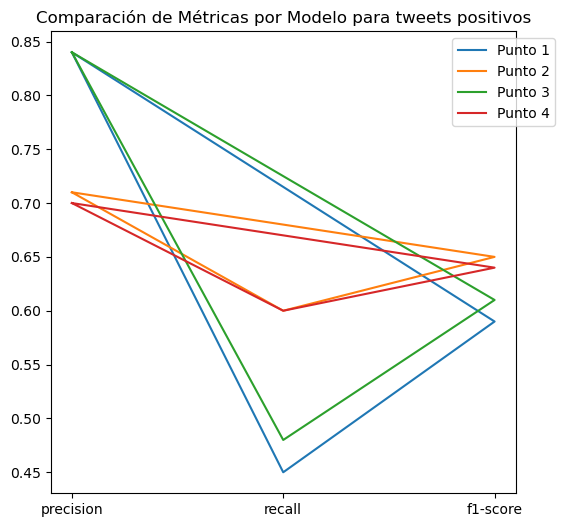

In [79]:
# Datos de ejemplo para cada modelo
modelo_1 = {'precision': 0.84, 'recall': 0.45, 'f1-score': 0.59}
modelo_2 = {'precision': 0.71, 'recall': 0.60, 'f1-score': 0.65}
modelo_3 = {'precision': 0.84, 'recall': 0.48, 'f1-score': 0.61}
modelo_4 = {'precision': 0.70, 'recall': 0.60, 'f1-score': 0.64}

# Lista de modelos y sus datos
modelos = ['Punto 1', 'Punto 2', 'Punto 3', 'Punto 4']
datos_modelos = [modelo_1, modelo_2, modelo_3, modelo_4]

# Nombre de las métricas
metricas = list(modelo_1.keys())

# Número de métricas
num_metricas = len(metricas)

# Ángulo de cada métrica
angulo = np.linspace(0, 2*np.pi, num_metricas, endpoint=False).tolist()

# Hacer que el gráfico sea circular
metricas += metricas[:1]
angulo += angulo[:1]

# Crear el gráfico de radar
plt.figure(figsize=(6, 6))
for i in range(len(modelos)):
    datos = datos_modelos[i]
    valores = list(datos.values())
    valores += valores[:1]
    plt.plot(angulo, valores, label=modelos[i])

# Establecer etiquetas de las métricas
plt.xticks(angulo[:-1], metricas[:-1])

# Agregar leyenda
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# Mostrar el gráfico
plt.title('Comparación de Métricas por Modelo para tweets positivos')
plt.show()


Al analizar la capacidad de los modelos respecto a la predicción de tweets negativos, es importante mencionar que esta es la categoría con mayor número de registros en los datos disponibles (62.7%). Por lo que se puede esperar que algunos modelos solo con predecir mayor cantidad de tweets negativos generen un accuracy relativamente alto. Consideramos que esto ocurre con los modelos del punto 1 y 3, que arrojan un recall muy alto para tweets negativos, mientras que los mismos modelos obtienen un recall mas bajo para tweets positivos (modelo punto 1:0.45 y modelo punto 3: 0.48). 

Por su parte el modelo 2 y 4, que implementan stopwords disminuyen el recall de los tweets negativos. Una posible causa podría ser la eliminación de palabras como 'no', 'not', 'cannot', 'couldnt', entre otras que cambian el sentido negativo del comentario. No obstante, mejora significativamente el recall de los tweets positivos, con 0.60 exactamente respecto al 0.45 y 0.48 de los modelos sin stopwords.

En conclusión, pese a que el modelo del punto 3 que aplica el proceso de lematización sin stopword ofrece el mejor accuracy (77,4%), el modelo 4 que adiciona el stopword al proceso de lematización ofrece un mayor recall para cada una de las categorías de los tweets aunque su accuracy sea un poco más bajo (76,1%). Por tanto, se podría considerar que el modelo 4 se ve menos influenciado por el desbalanceo de clases y podría mejorarse mediante ajustes a las stopwords que puedan estar cambiando el sentido negativo de algunos comentarios. 

In [97]:
#Revisión de palabras eliminadas mediante stopwords
stop_words = list(vect.get_stop_words())
if "no" in stop_words:
    print("La palabra 'no' está en la lista de palabras de detención.")

if "not" in stop_words:
    print("La palabra 'not' está en la lista de palabras de detención.")

if "cannot" in stop_words:
    print("La palabra 'cannot' está en la lista de palabras de detención.")

if "couldnt" in stop_words:
    print("La palabra 'couldnt' está en la lista de palabras de detención.")

La palabra 'no' está en la lista de palabras de detención.
La palabra 'not' está en la lista de palabras de detención.
La palabra 'cannot' está en la lista de palabras de detención.
La palabra 'couldnt' está en la lista de palabras de detención.
